**1. Matrix-Vector Product in Real Data**
- Load the **MNIST** dataset.
- Select the first image as a flattened vector $(\(28 \times 28 = 784\))$.
- Multiply this vector by a random matrix $\(A \in \mathbb{R}^{784 \times 784}\)$ to create a linear transformation of the image.
- Reconstruct the image from the result and visualize the change.

In [1]:
# Downloading MNIST dataset pytorch
import torch
from torchvision import datasets, transforms

MNIST_path = '../MNIST_data'

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST(MNIST_path, train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=64, shuffle=True)

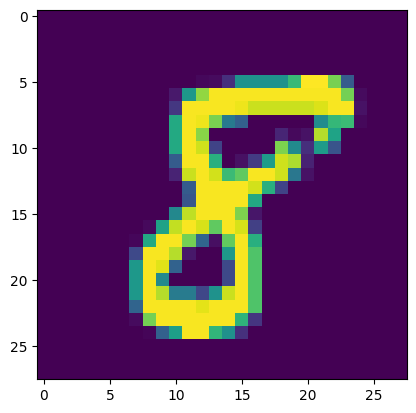

In [6]:
# load an image
import matplotlib.pyplot as plt
import numpy as np

# get some random training images and their labels, when we use next dataiter it returns the next batch ( we defined as 64 imagens )
dataiter = iter(train_loader)
images, labels = next(dataiter)

img = images[0].numpy()
img = np.transpose(img, (1, 2, 0))
plt.imshow(img)
plt.show()

In [7]:
print(images.shape) # (64, 1, 28, 28) 64 images, 1 channel, 28x28 pixels
print(labels.shape) # (64) 64 labels

torch.Size([64, 1, 28, 28])
torch.Size([64])


# Representing transformations as matrices

## Multiply by a rotation matrix to rotate the image

(28, 28)


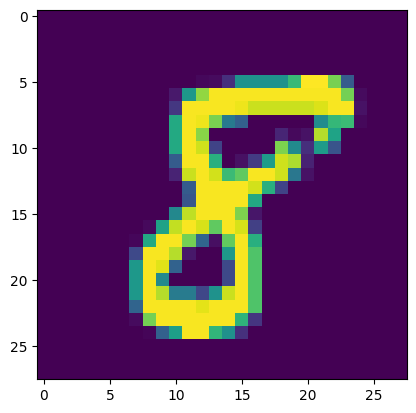

In [8]:
# First we need to put the image on a 2D plane
img = np.reshape(img, (28, 28))
print(img.shape) # (28, 28), removed the "channel" dimension

plt.imshow(img)
plt.show()

## Now we will vectorize the image, 28x28 = 784... so we will have a 784x1 vector. After that we will take an random rotation matrix and multiply it by this vector. After that we will reshape the vector to a 28x28 matrix and plot. We are basicly doing Image = RotationMatrix * Image

Image got reshape to : (28, 28)
Rotation matrix shape:  (784, 784)
[[0.50187089 0.42673715 0.09168566 ... 0.22065136 0.85117777 0.00530273]
 [0.49427973 0.41733167 0.48834535 ... 0.19644725 0.55823734 0.687542  ]
 [0.57208009 0.55675761 0.67720694 ... 0.27990155 0.33158926 0.85330915]
 ...
 [0.80172869 0.78115136 0.98699274 ... 0.54892387 0.43790828 0.84539284]
 [0.95292643 0.9192553  0.58418446 ... 0.17841868 0.04236097 0.81290664]
 [0.70453987 0.12663244 0.02987803 ... 0.63874974 0.9155059  0.7381371 ]]


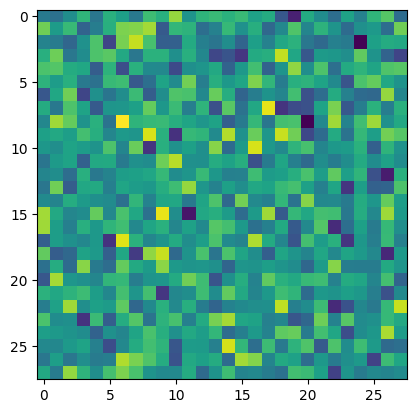

In [9]:
# transform this image in a 784 vector
img_784 = np.reshape(img, (784, 1))
print("Image got reshape to :", img.shape) # (784, 1)

# create a 784x748 matrix with random values
rotation_matrix = np.random.rand(784, 784)
print("Rotation matrix shape: ", rotation_matrix.shape)
print(rotation_matrix)

# multiply the image by the rotation matrix
rotated_img = np.matmul(rotation_matrix, img_784)

# reshape the image back to a 28x28 matrix
img = np.reshape(rotated_img, (28, 28))

plt.imshow(img)
plt.show()

# Now we will use the inverse of the rotation matrix, to get this noise back to the original image. Basically we are doing Image = (RotationMatrix)^-1 * Image

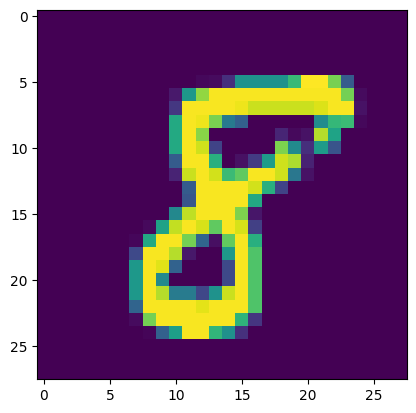

In [10]:
# now get inverse of the rotation matrix
inv_rotation_matrix = np.linalg.inv(rotation_matrix)

# multiply the rotated image by the inverse rotation matrix
rotated_img = np.matmul(inv_rotation_matrix, rotated_img)

# reshape the image back to a 28x28 matrix
img = np.reshape(rotated_img, (28, 28))

plt.imshow(img)
plt.show()